# Chapter 2
## Multi-armed Bandits

### 2.2 Action-value Methods

#### Exercise 2.1
In $\epsilon$-greedy action selection, for the case of two actions and $\epsilon = 0.5$, what is
the probability that the greedy action is selected?

- ***0.75***

### 2.3 The 10-armed Testbed

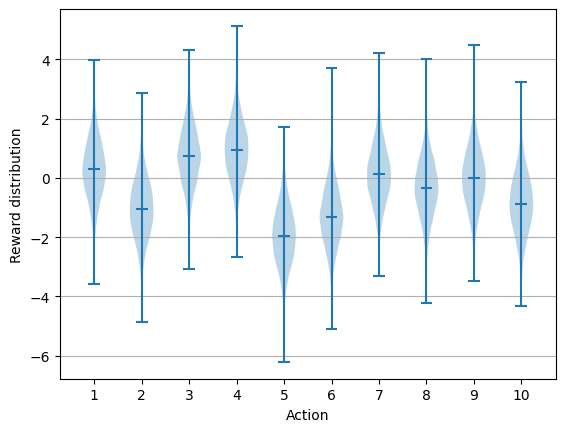

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

from bandit import run_episode
from agents import SampleAverageAgent, StepSizeAgent


k = 10
seed = 42
num_envs = 2000

vector_kwargs = dict(k=k)
env = gym.make_vec("ArmedBandit-v0", num_envs, "custom", vector_kwargs)
env.reset(seed=seed)
env.render()

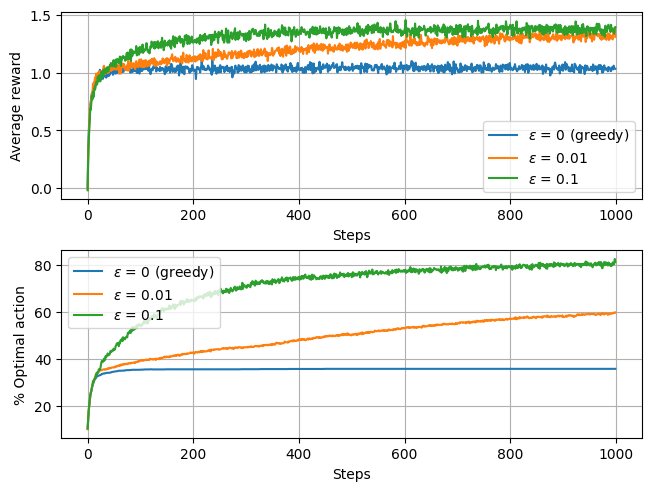

In [2]:
agents = {
    r"$\epsilon$ = 0 (greedy)": SampleAverageAgent(k, 0.0, num_envs),
    r"$\epsilon$ = 0.01": SampleAverageAgent(k, 0.01, num_envs),
    r"$\epsilon$ = 0.1": SampleAverageAgent(k, 0.1, num_envs)
}

data = {"avg_reward": {}, "optimal_action": {}}
seeds = [seed + i if seed is not None else None for i in range(len(agents))]
for i, (key, agent) in enumerate(agents.items()):
    rewards, optimals = run_episode(env, agent, seeds[i])
    data["avg_reward"][key] = rewards.mean(axis=1)
    data["optimal_action"][key] = 100 * optimals.mean(axis=1)


plt.figure(layout="constrained")

plt.subplot(211)
for key in agents.keys():
    plt.plot(key, data=data["avg_reward"])
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()
plt.grid(True)

plt.subplot(212)
for key in agents.keys():
    plt.plot(key, data=data["optimal_action"])
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.legend()
plt.grid(True)

plt.show()

#### Exercise 2.2: Bandit example
Consider a $k$-armed bandit problem with $k = 4$ actions, denoted $1$, $2$, $3$, and $4$. Consider applying to this problem a bandit algorithm using $\epsilon$-greedy action selection, sample-average action-value estimates, and initial estimates of $Q_1(a) = 0$, for all $a$. Suppose the initial sequence of actions and rewards is $A_1 = 1$, $R_1 = −1$, $A_2 = 2$, $R_2 = 1$, $A_3 = 2$, $R_3 = −2, A_4 = 2, R_4 = 2, A_5 = 3, R_5 = 0$. On some of these time steps the $\epsilon$ case may have occurred, causing an action to be selected at random. On which time steps did this definitely occur? On which time steps could this possibly have occurred?

- ***Definitely occured on $t = 4$ and $t = 5$***

- ***Possibly have ocurred on $t = 1$, $t = 2$ and $t = 3$***

#### Exercise 2.3
In the comparison shown in Figure 2.2, which method will perform best in the long run in terms of cumulative reward and probability of selecting the best action? How much better will it be? Express your answer quantitatively.

- ***$\epsilon = 0.01$ will perform best in the long run***
- ***In the long run, the probability of selecting the best action will be $(1 - \epsilon) + \epsilon / k = 1 - (k - 1) \epsilon / k$, which indicates that the lower the $\epsilon$, the greater the probability***
- ***% Optimal action: $99.1\%$***

### 2.5 Tracking a Nonstationary Problem

#### Exercise 2.4
If the step-size parameters, $\alpha_n$, are not constant, then the estimate $Q_n$ is a weighted average of previously received rewards with a weighting diferent from that given by (2.6). What is the weighting on each prior reward for the general case, analogous to (2.6), in terms of the sequence of step-size parameters?

- ***$Q_{n+1} = Q_1 \prod_{i=1}^n (1-\alpha_i) + \sum_{i=1}^n a_iR_i \prod_{j=i+1}^n (1-a_j)$***

#### Exercise 2.5 (programming)
Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean $0$ and standard deviation $0.01$ to all the $q_*(a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, $\alpha = 0.1$. Use $\epsilon = 0.1$ and longer runs, say of 10,000 steps.

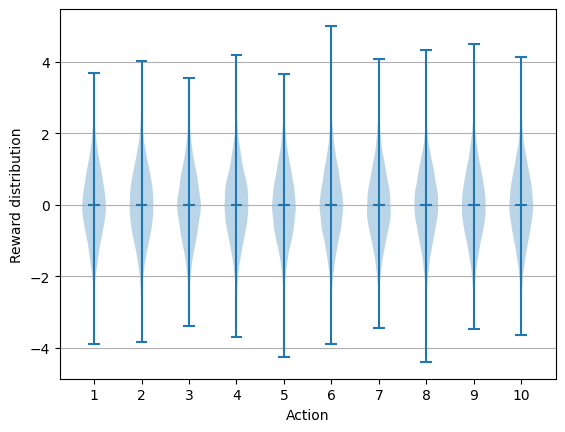

In [3]:
vector_kwargs = dict(k=k, stationary=False)
env = gym.make_vec("ArmedBandit-v0", num_envs, "custom", vector_kwargs)
env.max_episode_steps = 10000
env.reset(seed=seed)
env.render()

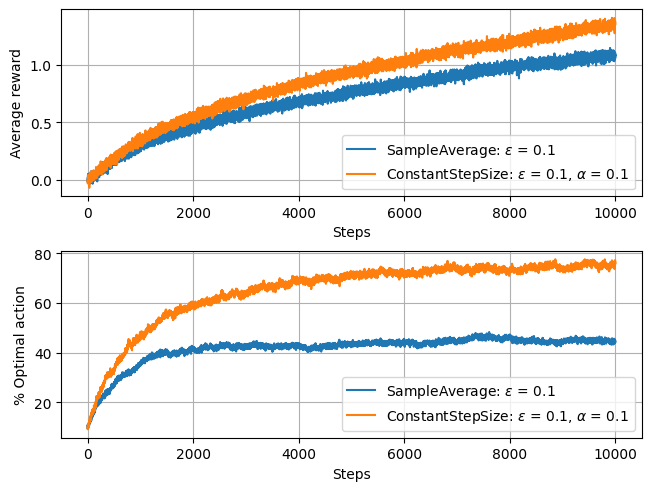

In [4]:
agents = {
    r"SampleAverage: $\epsilon$ = 0.1": SampleAverageAgent(k, 0.1, num_envs),
    r"ConstantStepSize: $\epsilon$ = 0.1, $\alpha$ = 0.1": StepSizeAgent(k, 0.1, 0.1, num_envs)
}

data = {"avg_reward": {}, "optimal_action": {}}
seeds = [seed + i if seed is not None else None for i in range(len(agents))]
for i, (key, agent) in enumerate(agents.items()):
    rewards, optimals = run_episode(env, agent, seeds[i])
    data["avg_reward"][key] = rewards.mean(axis=1)
    data["optimal_action"][key] = 100 * optimals.mean(axis=1)


plt.figure(layout="constrained")

plt.subplot(211)
for key in agents.keys():
    plt.plot(key, data=data["avg_reward"])
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()
plt.grid(True)

plt.subplot(212)
for key in agents.keys():
    plt.plot(key, data=data["optimal_action"])
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.legend()
plt.grid(True)

plt.show()